  # Exercise 7 | Principle Component Analysis 

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import itertools

In [34]:
%matplotlib inline

## Part 1: Load Example Dataset  
  We start this exercise by using a small dataset that is easily to
  visualize.


In [35]:
ex7data1 = scipy.io.loadmat('ex7data1.mat')
X = ex7data1['X']

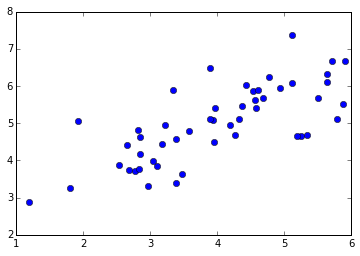

In [36]:
def plot_data(X, ax):
    ax.plot(X[:,0], X[:,1], 'bo')
    
fig, ax = plt.subplots()
plot_data(X, ax)

In [37]:
def normalize_features(X):
    mu = np.mean(X, 0)
    X_norm = X - mu
    sigma = np.std(X_norm, 0)
    X_norm = X_norm / sigma
    return X_norm, mu, sigma

In [38]:
X_norm, mu, sigma = normalize_features(X)

## Part 2: Principal Component Analysis 
  You should now implement PCA, a dimension reduction technique. You
  should complete the following code.


In [39]:
def pca(X):
    #PCA Run principal component analysis on the dataset X
    #   [U, S] = pca(X) computes eigenvectors of the covariance matrix of X
    #   Returns the eigenvectors U, the eigenvalues in S
    #

    m, n = X.shape    
    
    # You need to return the following variables correctly.
    U = np.zeros((n, n))
    S = np.zeros(n)
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: You should first compute the covariance matrix. Then, you
    #               should use the "scipy.linalg.svd" function to compute the eigenvectors
    #               and eigenvalues of the covariance matrix. 
    #
    # Note: When computing the covariance matrix, remember to divide by m (the
    #       number of examples).
    #

    
    
    # =========================================================================
    
    return U, S

In [40]:
U, S = pca(X_norm)
U

array([[ 0.,  0.],
       [ 0.,  0.]])

  Draw the eigenvectors centered at mean of data. These lines show the
  directions of maximum variations in the dataset.

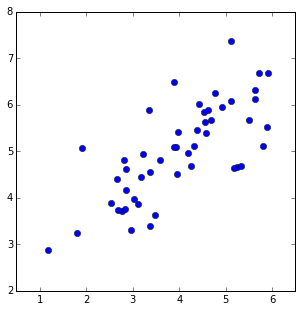

In [41]:
def draw_line(a, b, ax, *args):
    ax.plot([a[0], b[0]], [a[1], b[1]], *args)

fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim(2, 8)
ax.set_xlim(0.5, 6.5)
ax.set_aspect('equal')
plot_data(X, ax)
ax.plot(mu[0], mu[1])
draw_line(mu, mu + 1.5 * S[0] * U[0, :], ax, '-k')
draw_line(mu, mu + 1.5 * S[1] * U[1, :], ax, '-k')

The top eigenvector should be `[-0.707107, -0.707107]`.

In [42]:
U[0]

array([ 0.,  0.])

##  Part 3: Dimension Reduction 
  You should now implement the projection step to map the data onto the 
  first k eigenvectors. The code will then plot the data in this reduced 
  dimensional space.  This will show you what the data looks like when 
  using only the corresponding eigenvectors to reconstruct it.

  You should complete the code in `project_data`.


In [43]:
def project_data(X, U, K):
    #PROJECTDATA Computes the reduced data representation when projecting only 
    #on to the top k eigenvectors
    #   Z = projectData(X, U, K) computes the projection of 
    #   the normalized inputs X into the reduced dimensional space spanned by
    #   the first K columns of U. It returns the projected examples in Z.
    #
    # You need to return the following variables correctly.
    Z = np.zeros((X.shape[0], K))
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the projection of the data using only the top K 
    #               eigenvectors in U (first K columns). 
    #               For the i-th example X(i,:), the projection on to the k-th 
    #               eigenvector is given as follows:
    #                    x = X[i, :].T
    #                    projection_k = x.T.dot(U(:, k));
    #
    
    
    
    
    
    
    # =============================================================
    
    return Z

Projection of the first example: (should be about `1.49631261`)

In [44]:
K = 1
Z = project_data(X_norm, U, K)
Z[0,0]

0.0

In [45]:
def recover_data(Z, U, K):
    #RECOVERDATA Recovers an approximation of the original data when using the 
    #projected data
    #   X_rec = RECOVERDATA(Z, U, K) recovers an approximation the 
    #   original data that has been reduced to K dimensions. It returns the
    #   approximate reconstruction in X_rec.
    #
    
    # You need to return the following variables correctly.
    X_rec = np.zeros((Z.shape[0], U.shape[0]))
    
    
    # ====================== YOUR CODE HERE ======================
    # Instructions: Compute the approximation of the data by projecting back
    #               onto the original space using the top K eigenvectors in U.
    #
    #               For the i-th example Z(i,:), the (approximate)
    #               recovered data for dimension j is given as follows:
    #                    v = Z(i, :)';
    #                    recovered_j = v' * U(j, 1:K)';
    #
    #               Notice that U(j, 1:K) is a row vector.
    #               
    
    
    
    
    
    # =============================================================
    
    return X_rec

Approximation of the first example: (should be about `[-1.05805279, -1.05805279]`)

In [46]:
X_rec = recover_data(Z, U, K)
X_rec[0]

array([ 0.,  0.])

  Draw lines connecting the projected points to the original points

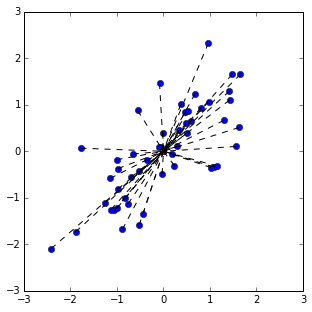

In [47]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_ylim(-3, 3)
ax.set_xlim(-3, 3)
ax.set_aspect('equal')
plot_data(X_norm, ax)
ax.plot(X_rec[:,0], X_rec[:,1], 'ro')

for x_norm, x_rec in zip(X_norm, X_rec):
    draw_line(x_norm, x_rec, ax, '--k')

## Part 4: Loading and Visualizing Face Data 
  We start the exercise by first loading and visualizing the dataset.
  The following code will load the dataset into your environment, and later display the first 100 faces in the dataset.


In [48]:
X = scipy.io.loadmat('ex7faces.mat')['X']
X.shape

(5000, 1024)

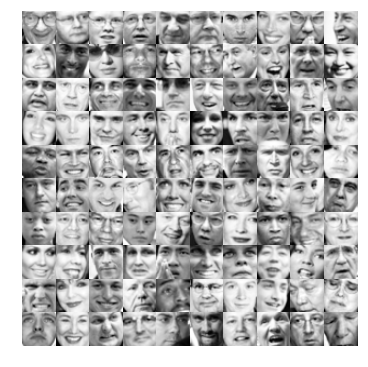

In [49]:
def display_faces(X, example_width=None):
    example_size = len(X[0])
    if example_width is None:
        example_width = int(np.sqrt(example_size))
    num_examples = len(X)
    figures_row_length = int(np.sqrt(num_examples))
        
    fig, axes = plt.subplots(nrows=figures_row_length, ncols=figures_row_length, figsize=(6,6))
    fig.subplots_adjust(wspace=0, hspace=0)
    for i, j in itertools.product(range(figures_row_length), range(figures_row_length)):
        ax = axes[i][j]
        ax.set_axis_off()
        ax.set_aspect('equal')
        example = X[i*figures_row_length + j].reshape(example_size//example_width, example_width).T
        ax.imshow(example, cmap='Greys_r')
        
display_faces(X[:100])

## Part 5: PCA on Face Data: Eigenfaces  
  Run PCA and visualize the eigenvectors which are in this case eigenfaces
  We display the first 64 eigenfaces.

  Before running PCA, it is important to first normalize X.


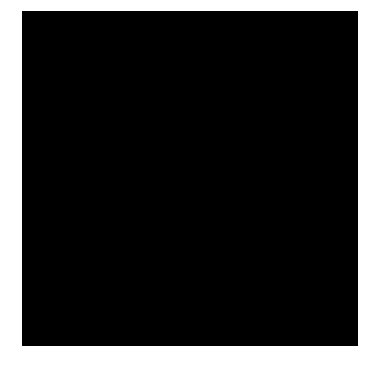

In [50]:
X_norm, mu, sigma = normalize_features(X)
U, S = pca(X_norm)
display_faces(U[:, :64].T)

##  Part 6: Dimension Reduction for Faces 
  Project images to the eigen space using the top k eigenvectors 

In [51]:
K = 100
Z = project_data(X_norm, U, K)
Z.shape

(5000, 100)

## Part 7: Visualization of Faces after PCA Dimension Reduction 
  Project images to the eigen space using the top K eigen vectors and 
  visualize only using those K dimensions.
  Compare to the original input.

In [ ]:
X_rec = recover_data(Z, U, K)
X_rec.shape

(5000, 1024)

In [ ]:
display_faces(X_rec[:100])